## Algo de Deutsh-Josza
Permet d'évaluer une fonction, constante ou équilibrée.
Si on a 000, c'est contant, sinon c'est équilibré.
3 portes H vers un oracle. Si l'oracle n'est composé d'aucune porte : ça sera toujours constant.
-> changer l'oracle pour qu'il y ait toujours 1.
On ajoute X.

Oracle équilibré : la moitié donne 0 et l'autre donne 1.

/usr/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


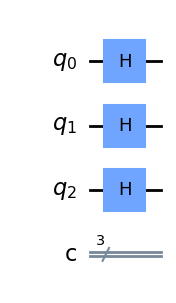

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import *


circuit = QuantumCircuit(3, 3)
circuit.h(1)
circuit.h(2)
circuit.h(0)

circuit.draw('mpl')

## Question 1

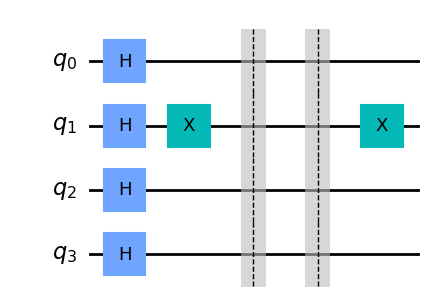

In [2]:
# Oracle équilibré
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

# set the length of the n-bit input string. 
n = 3

balanced_oracle = QuantumCircuit(n+1)
b_str = "010"

# Place H-gates
for qubit in range(len(b_str)):
    balanced_oracle.h(qubit)
balanced_oracle.h(n)
balanced_oracle.x(1)

# Use barrier as divider
balanced_oracle.barrier()

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

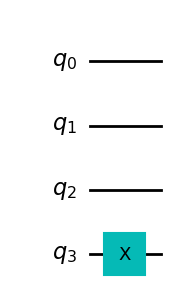

In [4]:
# Oracle Constant
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw("mpl")

## Question 2 :
Non, il n'existe pas d'autres implémentations.

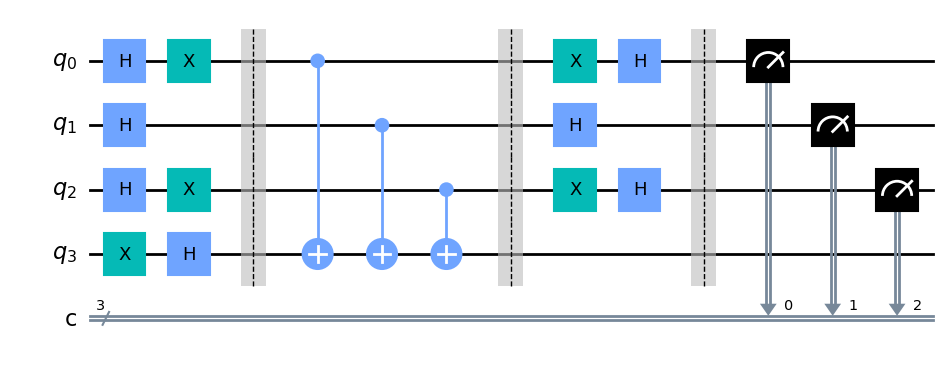

In [6]:
# Question 3 :

# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)
# Display circuit
dj_circuit.draw('mpl')


# use local simulator
#aer_sim = Aer.get_backend('aer_simulator')
#results = aer_sim.run(dj_circuit).result()
#answer = results.get_counts()

#plot_histogram(answer)

/home/toto/Nextcloud/UTC/S3/AI29/TP/AI29/.venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


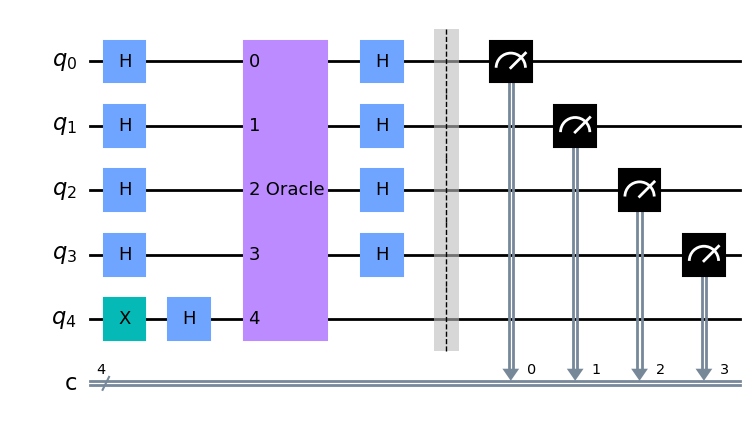

In [1]:
#Question 4
# importing Qiskit
from qiskit import IBMQ, Aer
#from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile
from qiskit_textbook.problems import dj_problem_oracle
# import basic plot tools
from qiskit.visualization import plot_histogram

from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(1)
oracle.name = " Oracle"

n = 4
dj_circuit = QuantumCircuit(n+1, n)

for qubit in range(n):
    dj_circuit.h(qubit)

dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.append(oracle, range(n+1))

for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw('mpl')

## Quesiton 5
La fonction dj_problem_oracle retourne un oracle selon l'algotithme de Deutsch-Jozsa pour n=4 sous forme d'une porte. La porte prend entrée 5 qubits, où le dernier (q_4) est le qubit d'output. On peut donc avoir des oracles différents en donnant des entiers différents entre 1 et 5 à la fonction dj_problem_oracle.